# Devoir Maison UE FpA - Musicologie

KANG Jiale

## import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import IPython
import soundfile as sf
import os

## functions

In [2]:
def bjorklund(k, n):
# @function: bjorklund algorithm to generate euclidean rhythms
# @param k: the number of hits
# @param n: the number of steps
# @return: a list of 0s and 1s representing the rhythm

    if k > n:
        raise ValueError("k must be less than or equal to n")
    if n == 0:
        return []
    sequence = [[1] for _ in range(k)]
    remainder = [[0] for _ in range(n - k)]

    lr = len(remainder)
    while lr > 1:
        for i in range(min(len(sequence), len(remainder))):
            sequence[i].extend(remainder.pop(0))
        if len(remainder) == 0:
            remainder = sequence[lr:]
            sequence = sequence[:lr]
        lr = len(remainder)
    
    sequence = sequence + remainder

    return [item for sublist in sequence for item in sublist]


In [3]:
def setsExpression(sequence):
# @function: sets expression of the rhythm
# @param sequence: biniary list representing the rhythm
# @return: a string representing the rhythm

    return "{" + ", ".join([f"{i}" for i, x in enumerate(sequence) if x == 1]) + "}"

## Question 1

Explain why these sets are called "maximally even" and where the name "Euclidean" comes from to characterize them.

**My Answer:**

The sets are created as a solution of a problem, which could be modeled as "For a given number $n$ of time intervals and $k(k<n)$ of pulses, distribute the pulses as evenly as possible among these intervals". That's why they are called "maximal evenly" sets. Bjorklund gave a binary representation of this problem: construct a binary sequence of $n$ bits with $k$ one's, such that the $k$ one's are distributed as evenly as possible among the zero's. In order to solve this problem, Bjorklund proposed an algorithm which has the same structure as the Euclidean algorithm.

Euclidean algorithm is used to compute the greatest common divisor (GCD) of two given integers. The idea of the whole algorithm could be described as "The smaller number is repeatedly subtracted from the greater number to produce the remainder, and remainder is repeatedly subtracted from the smaller number to update itself. Repeat this process until the remainder is zero."

## Question 2

List all Euclidean rhythms $E(k,18)$ with $1<k<18$ and give their circular representation accompanied by the set expression. In each case, state whether they are periodic or not (as well as their complementary).

**My Answer:**

In [4]:
def circularRepresentation(sequence):
# @function: show the figure of circular representation of the rhythm and save the figure
# @param sequence: biniary list representing the rhythm

    # get number of k,n
    k = sum(sequence)
    n = len(sequence)

    # get index of 1s in the sequence
    connections = [i for i, x in enumerate(sequence) if x == 1]

    # set radius and center of the circle
    radius = 1
    center = (0, 0)

    # calculate the coordinates of each point on the circle
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [(np.sin(angle) * radius, np.cos(angle) * radius) for angle in angles]

    # draw the circle and points
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    circle = plt.Circle(center, radius, color='black', fill=False)
    ax.add_artist(circle)

    # draw points
    for i, (x, y) in enumerate(points):
        ax.plot(x, y, 'ko', markersize=15, markerfacecolor='w', markeredgewidth=1.5)
        ax.text(x * 1.15, y * 1.15, str(i), fontsize=12, ha='center', va='center')
    
    for i in range(len(connections)):
        ax.plot(points[connections[i]][0], points[connections[i]][1], 'ro', markersize=15, markerfacecolor='r', markeredgewidth=1.5)
      
    # draw connection lines
    for i in range(len(connections)):
        start_point = points[connections[i]]
        end_point = points[connections[(i + 1) % len(connections)]]
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'b-')
    
    # set the properties of the graph
    ax.set_aspect('equal')
    ax.set_xlim([-(radius + 0.5), (radius + 0.5)])
    ax.set_ylim([-(radius + 0.5), (radius + 0.5)])
    ax.axis('off')

    # add title
    ax.set_title(f"E({k},{n})")
    plt.show()

    # save figure
    fig.savefig(f"E({k},{n})" + ".png")

In [5]:
def calculatePeriodic(sequence):
# @function: check if the rhythm is periodic
# @param sequence: biniary list representing the rhythm
# @return: minimal period if the rhythm is periodic, 0 otherwise

    n = len(sequence)
    for i in range(1, n):
        if sequence == sequence[i:] + sequence[:i]:
            return i
    return 0

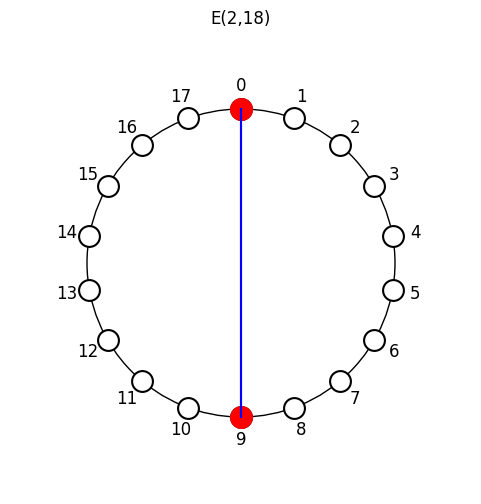

E(2,18)={0, 9}
Periodic: 9


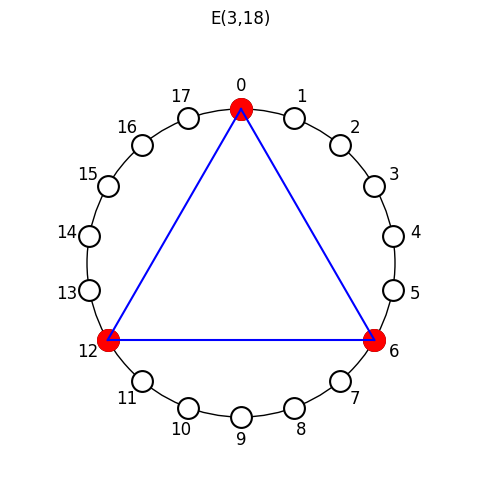

E(3,18)={0, 6, 12}
Periodic: 6


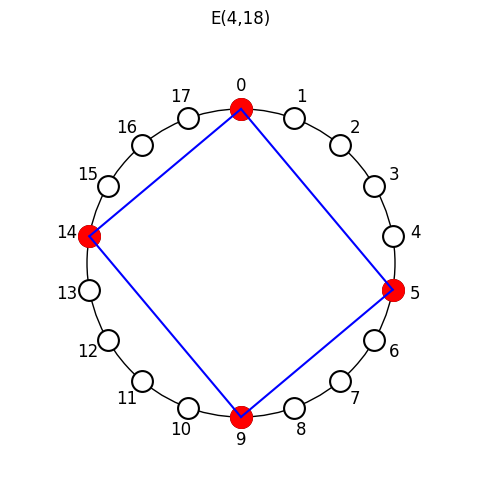

E(4,18)={0, 5, 9, 14}
Periodic: 9


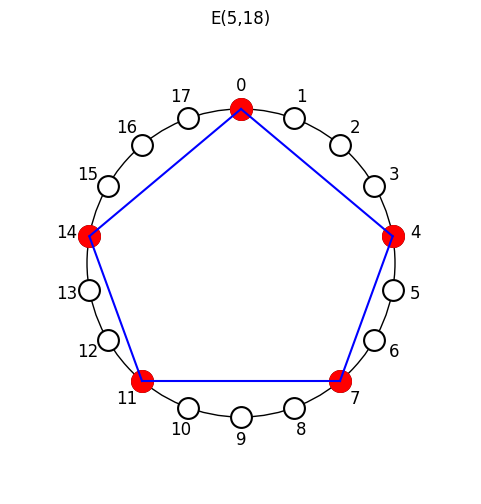

E(5,18)={0, 4, 7, 11, 14}
Not periodic


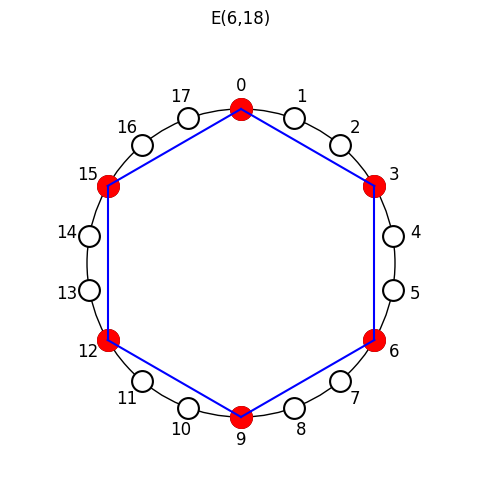

E(6,18)={0, 3, 6, 9, 12, 15}
Periodic: 3


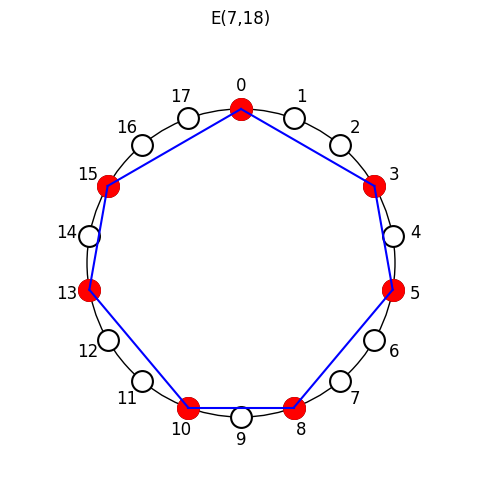

E(7,18)={0, 3, 5, 8, 10, 13, 15}
Not periodic


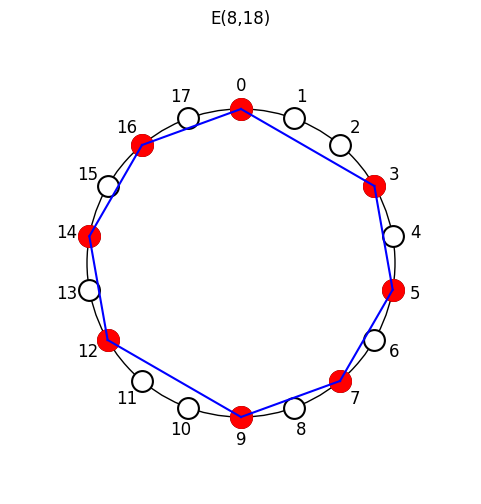

E(8,18)={0, 3, 5, 7, 9, 12, 14, 16}
Periodic: 9


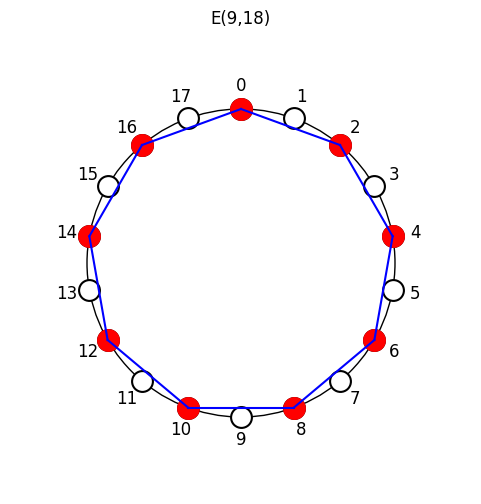

E(9,18)={0, 2, 4, 6, 8, 10, 12, 14, 16}
Periodic: 2


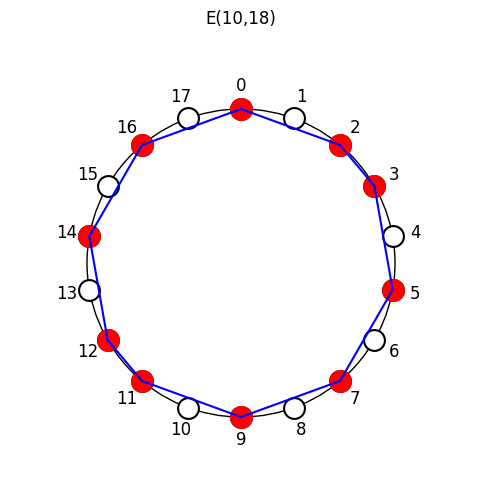

E(10,18)={0, 2, 3, 5, 7, 9, 11, 12, 14, 16}
Periodic: 9


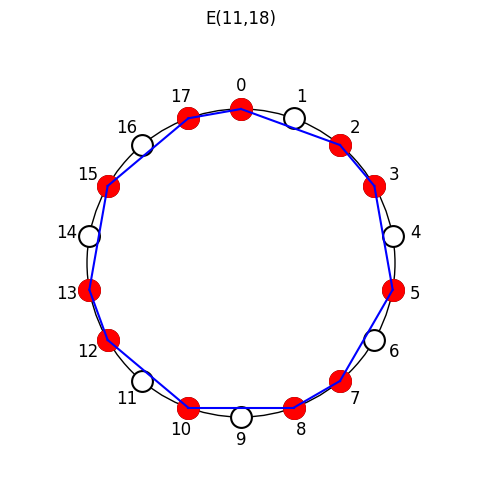

E(11,18)={0, 2, 3, 5, 7, 8, 10, 12, 13, 15, 17}
Not periodic


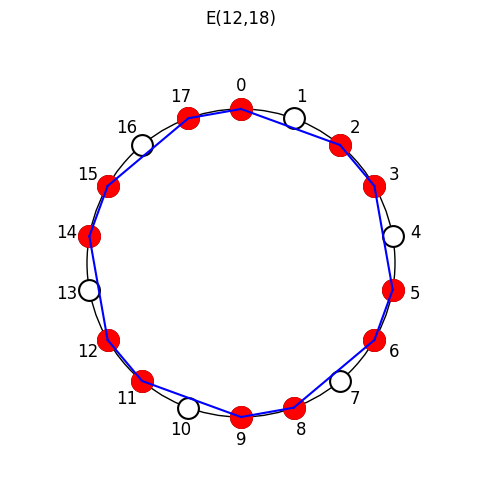

E(12,18)={0, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17}
Periodic: 3


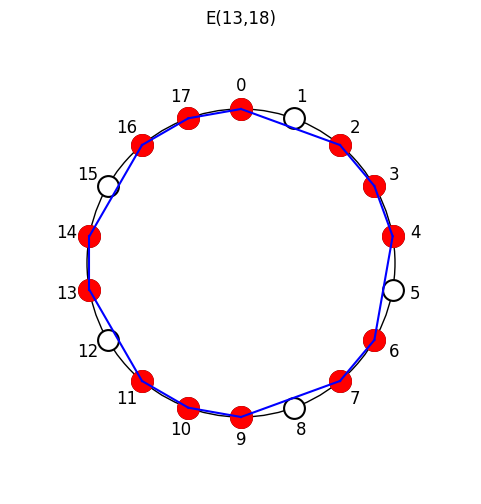

E(13,18)={0, 2, 3, 4, 6, 7, 9, 10, 11, 13, 14, 16, 17}
Not periodic


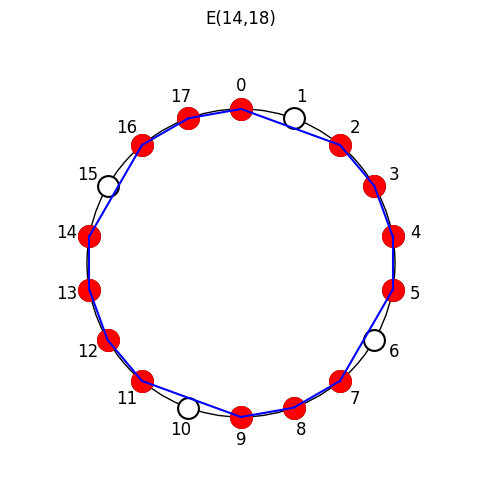

E(14,18)={0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17}
Periodic: 9


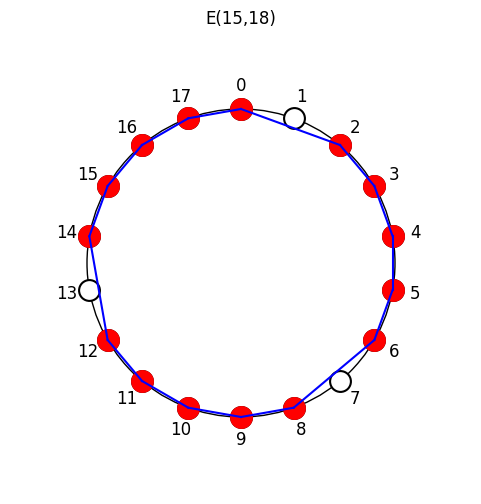

E(15,18)={0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17}
Periodic: 6


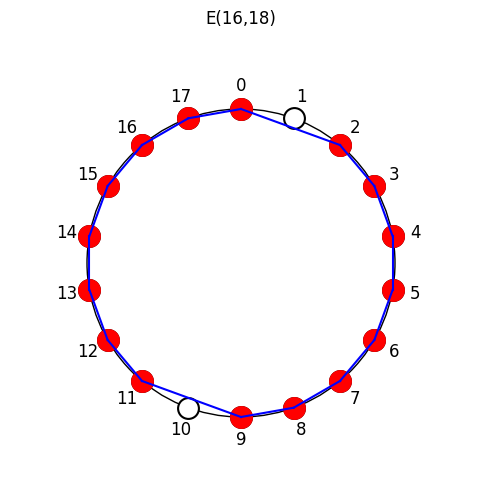

E(16,18)={0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17}
Periodic: 9


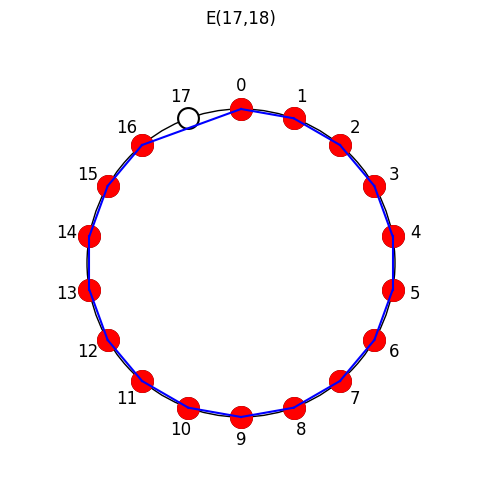

E(17,18)={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
Not periodic


In [6]:
for i in range(2,18):
    seq = bjorklund(i, 18)
    circularRepresentation(seq)
    print(f"E({i},18)={setsExpression(seq)}")
    period = calculatePeriodic(seq)
    if period:
        print(f"Periodic: {period}")
    else:
        print("Not periodic")


## Question 3

Code in Python the function E(k,n) that generates the ME-set (or Euclidean rhythm) with k notes in a subdivision of the circle into n equal parts.

**My Answer:**

As it discribed in function `bjorklund(k,n)`.

## Question 4

Using the "Rhythmic Circle" web environment seen in the course, find three Euclidean rhythms $E(k,n)$, $E(k',n)$, $E(k'',n)$ such that no notes are played together (rotations are allowed) with $k,k',k''>2$ and represent them in a drawing. Try to do the exercise independently, without choosing the same values as your colleagues (statistically, this is quite possible).

**My Answer:**

In [7]:
def isRepeatedNotes(seq1, seq2, seq3):
# @function: check if the rhythm has repeated notes (only one note at one position is called not repeated)
# @param seq 1,2,3: biniary list representing the rhythm with the same length
# @return: True if there are repeated notes, False and three sequences otherwise

    n = len(seq1)
    for i in range(n):
        rot_seq1 = seq1[i:] + seq1[:i]
        for j in range(n):
            rot_req2 = seq2[j:] + seq2[:j]
            seq_logic = [((not a) and (not b)) or ((not a) and (not c)) or ((not b) and (not c)) for a,b,c in zip(rot_seq1, rot_req2, seq3)]
            if all(seq_logic):
                return False, rot_seq1, rot_req2, seq3
    return True, [], [], []

Assume $n=15$, first try to get all of the combinations.

In [8]:
# store the results of E(i,15) with no repeated notes
res = []

for i in range(2, 15):
    for j in range(i+1, 15):
        for k in range(j+1, 15):
            seq1 = bjorklund(i, 15)
            seq2 = bjorklund(j, 15)
            seq3 = bjorklund(k, 15)
            isRepeated, seq1, seq2, seq3 = isRepeatedNotes(seq1, seq2, seq3)
            if not isRepeated:
                res.append((i, j, k, seq1, seq2, seq3))
                print("========================================")
                print(f"E({i},15)={setsExpression(seq1)}")
                print(f"E({j},15)={setsExpression(seq2)}")
                print(f"E({k},15)={setsExpression(seq3)}")


E(2,15)={5, 13}
E(3,15)={1, 6, 11}
E(4,15)={0, 4, 8, 12}
E(2,15)={6, 14}
E(3,15)={2, 7, 12}
E(6,15)={0, 3, 5, 8, 10, 13}
E(2,15)={5, 13}
E(4,15)={3, 7, 11, 14}
E(7,15)={0, 2, 4, 6, 8, 10, 12}
E(2,15)={3, 11}
E(4,15)={1, 5, 9, 13}
E(8,15)={0, 2, 4, 6, 8, 10, 12, 14}


Then draw each of the combinations in a graph.

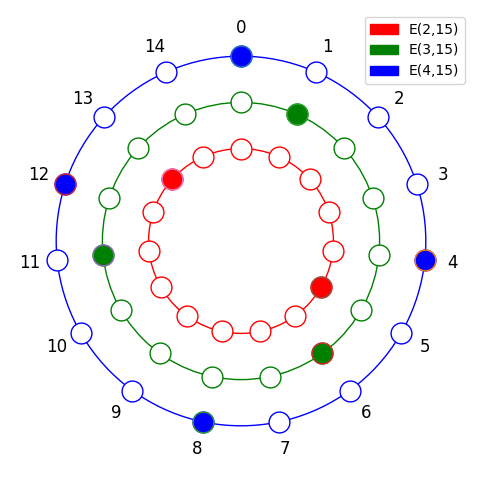

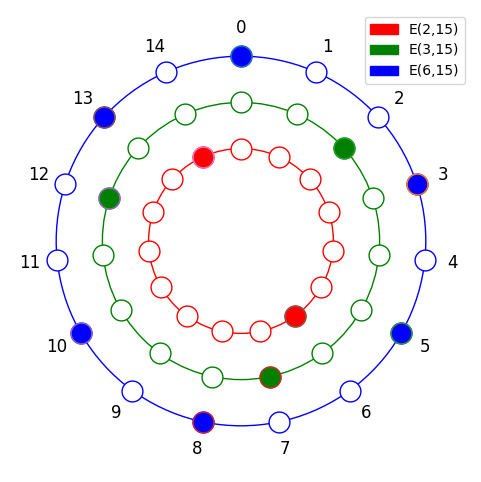

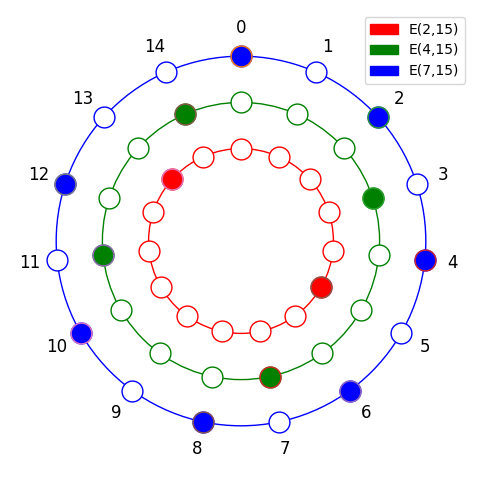

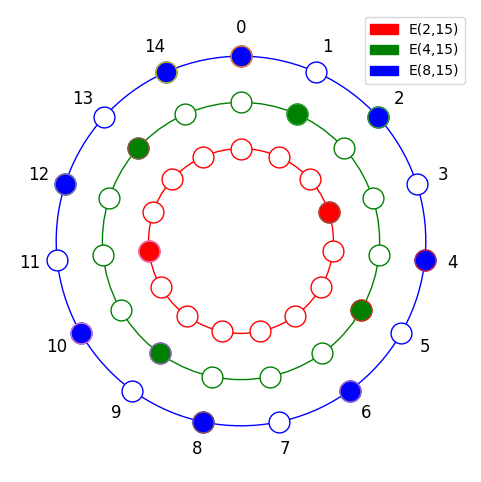

In [9]:
for k1, k2, k3, seq1, seq2, seq3 in res:

    n = len(seq1)

    # set radius and center of the circle
    radius = [1, 1.5, 2]
    center = (0, 0)

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    handles = []
    
    # calculate the coordinates of each point on the circle
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    for k, r, seq, color in zip([k1, k2, k3], radius, [seq1, seq2, seq3], ['red', 'green', 'blue']):
        points = [(np.sin(angle) * r, np.cos(angle) * r) for angle in angles]
        circle = plt.Circle(center, r, color=color, fill=False)
        ax.add_artist(circle)
        for i, (x, y) in enumerate(points):
            ax.plot(x, y, 'o',  markerfacecolor='w', markersize=15, markeredgecolor=color)
            if r == 2:
                ax.text(x * 1.15, y * 1.15, str(i), fontsize=12, ha='center', va='center')
        connections = [i for i, x in enumerate(seq) if x == 1]
        for i in range(len(connections)):
            ax.plot(points[connections[i]][0], points[connections[i]][1], 'o', markersize=15, markerfacecolor=color)
            start_point = points[connections[i]]
        # add handle to the legend
        phandle = patches.Patch(color=color, label=f"E({k},{n})")
        handles.append(phandle)
        
    # set the properties of the graph
    ax.set_aspect('equal')
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.5, 2.5])
    ax.axis('off')
    ax.legend(handles=handles)

    plt.show()

## Question 5

Still using the "Rhythmic Circle" web environment and (possibly) notation software (Musescore, Finale, Sibelius or other software of your choice), produce the audio files (mp3 or wav) of an original composition using ME-sets of cardinality 11 and 13 in a circle divided into 24 equal parts.

**My Answer:**

In [10]:
file_name = "my_music.wav"
file_path = os.path.join(os.getcwd(), file_name) 

IPython.display.Audio(file_path)